# <font color="#644BBF"> DIAMOND PRICE ANALYSIS

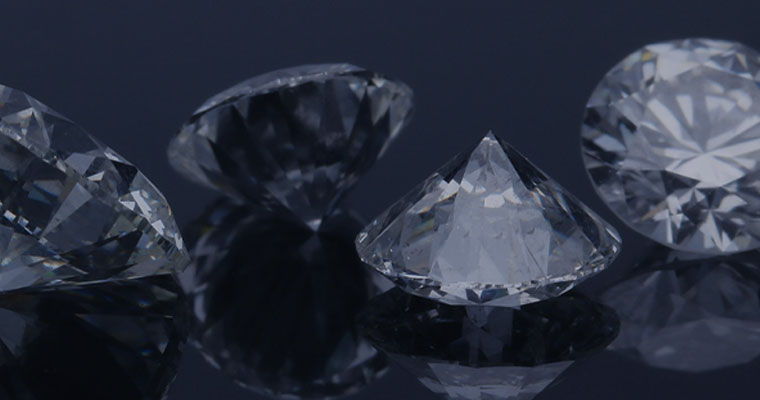

## <font color="#644BBF"> Predicting Diamond Prices Based on Attributes

### <font color="#644BBF">  Aim
The aim of this project is to develop a predictive model to estimate the price of diamonds based on various physical and qualitative attributes. This model will provide insights into the factors that influence diamond pricing and help in making informed decisions when evaluating or purchasing diamonds. Using machine learning techniques, we aim to achieve a high level of accuracy in predicting diamond prices.

### <font color="#644BBF">  Dataset Description
The dataset consists of detailed information about 53,940 diamonds, including their prices and various physical and qualitative attributes. Below is a summary of the features:

- **price**: Price of the diamond in US dollars (ranging from \$326 to \$18,823).
- **carat**: Weight of the diamond (ranging from 0.2 to 5.01).
- **cut**: Quality of the diamond cut, categorized into five levels: `Fair`, `Good`, `Very Good`, `Premium`, and `Ideal`.
- **color**: Color grade of the diamond, ranging from `J` (worst) to `D` (best).
- **clarity**: Measure of diamond clarity, with eight levels from `I1` (worst) to `IF` (best).
- **x**: Length of the diamond in millimeters (ranging from 0 to 10.74).
- **y**: Width of the diamond in millimeters (ranging from 0 to 58.9).
- **z**: Depth of the diamond in millimeters (ranging from 0 to 31.8).
- **depth**: Total depth percentage calculated as \( \text{depth} = \frac{z}{\text{mean}(x, y)} = \frac{2 \cdot z}{x + y} \) (ranging from 43% to 79%).
- **table**: Width of the top of the diamond relative to its widest point (ranging from 43% to 95%).

This dataset provides a rich combination of numerical and categorical features, making it ideal for exploratory data analysis, feature engineering, and predictive modeling.

## <font color="#644BBF">Requirements

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', None)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import plotly.express as px

## <font color="#644BBF">Import Data

In [82]:
df=pd.read_csv("diamonds.csv")

In [83]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [84]:
df=df.drop("Unnamed: 0",axis=1)

## <font color="#644BBF">EDA (Exploratory Data Analysis)

In [86]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [87]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [88]:
df.shape

(53940, 10)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [91]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [92]:
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [93]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

## <font color="#644BBF">Feature Engineering

In [95]:
df["size"]=df["x"]*df["y"]*df["z"]

In [96]:
#df["cut"]=df["cut"].map({"Ideal":1,"Premium":2,"Good":3,"Very Good":4,"Fair":5})

In [97]:
df.sample(3)

,carat,cut,color,clarity,depth,table,price,x,y,z,size
30839,0.33,Ideal,H,VS1,61.7,54.0,743,4.47,4.45,2.75,54.701625
39082,0.31,Premium,E,IF,61.0,59.0,1060,4.36,4.39,2.67,51.104868
14122,1.05,Ideal,H,VS2,61.7,57.0,5728,6.52,6.55,4.03,172.105180


## <font color="#644BBF"> Data Visualization

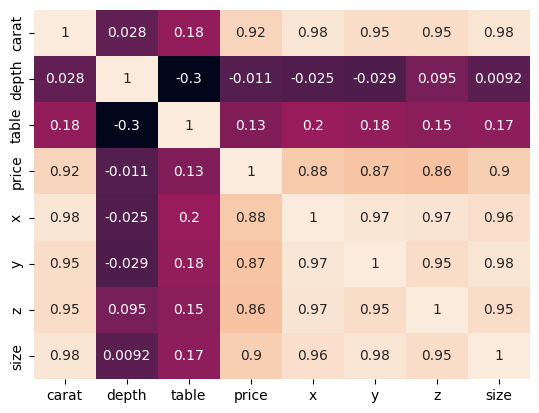

In [99]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cbar=False);

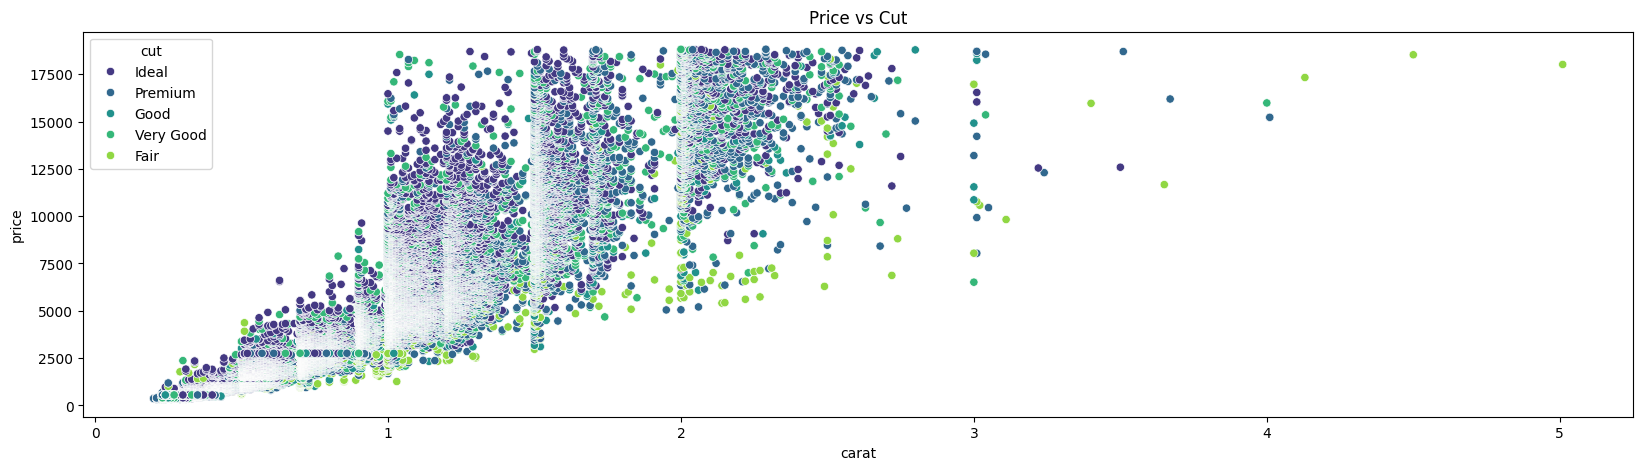

In [100]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=df["carat"],y=df["price"],hue=df["cut"],palette="viridis")
plt.title("Price vs Cut");

We can see linear relationship between the number of carats and the price of a diamond, so we can understand that **higher carats** result in **higher prices**.

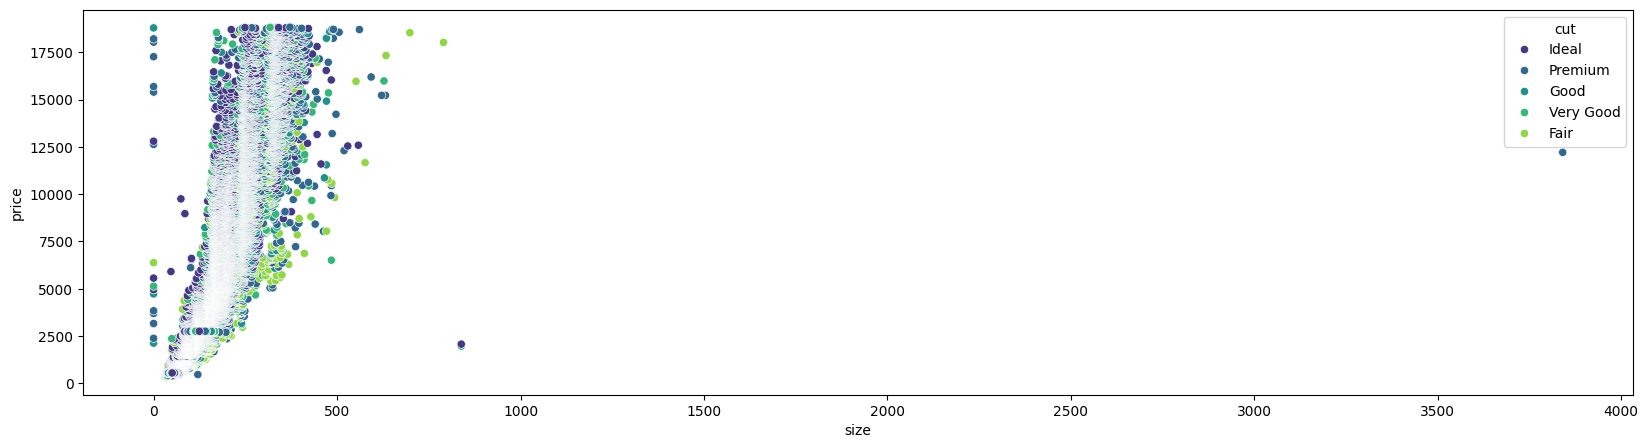

In [102]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=df["size"],y=df["price"],hue=df["cut"],palette="viridis");

There is a linear relationship between the size of all types of diamonds based on their colour.

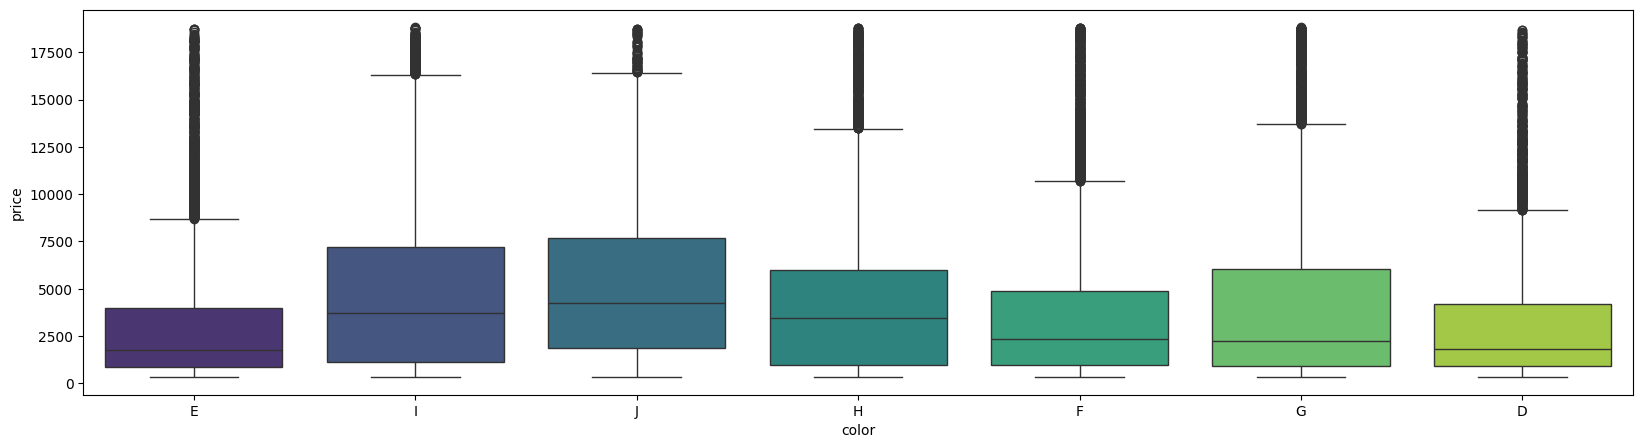

In [104]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df["color"],y=df["price"],palette="viridis");

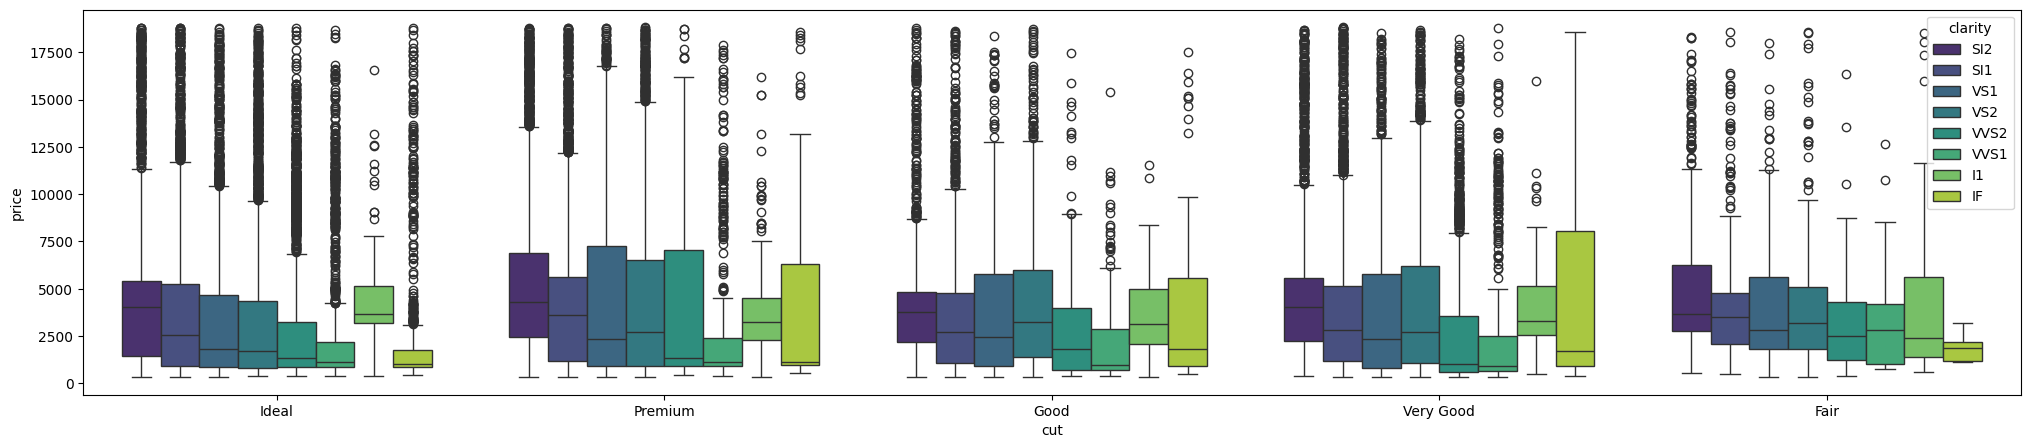

In [105]:
plt.figure(figsize=(25,5))
sns.boxplot(x=df["cut"],y=df["price"],hue=df["clarity"],palette="viridis");

## <font color="#644BBF">Modelling 

In [107]:
df.corr(numeric_only=True)["price"].sort_values(ascending=False)

price    1.000000
carat    0.921591
size     0.902385
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

In [108]:
x=df[["size","carat","cut","color","clarity"]]
y=df[["price"]]

In [109]:
x.head()

,size,carat,cut,color,clarity
0,38.202030,0.23,Ideal,E,SI2
1,34.505856,0.21,Premium,E,SI1
2,38.076885,0.23,Good,E,VS1
3,46.724580,0.29,Premium,I,VS2
4,51.917250,0.31,Good,J,SI2


In [36]:
x.shape,y.shape

((53940, 5), (53940, 1))

In [37]:
x=pd.get_dummies(x,drop_first=True)

In [38]:
def regression_algo(x,y,plot=False):
    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    kn=KNeighborsRegressor()
    dt=DecisionTreeRegressor()
    xgb=XGBRegressor()
    rf=RandomForestRegressor()

    algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb,rf]
    algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Bossting','KNeighborRegressor','DecisionTreeRegressor','XGBReggressor','Random Forest Classifier']

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

    r_squared=[]
    rmse=[]
    mae=[]

    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)

    for algo in algos:
        p=algo.fit(x_train,y_train).predict(x_test)
        r_squared.append(r2_score(y_test,p))
        rmse.append(mean_squared_error(y_test,p)**0.5)
        mae.append(mean_absolute_error(y_test,p))

    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae

    r_table=result.sort_values('R_Squared',ascending=False)
    if plot:
        best_model = algos[r_squared.index(max(r_squared))]
        y_pred = best_model.predict(x_test)
        
        plt.figure(figsize=(10,6))
        plt.plot(y_test.reset_index(drop=True),label='Acutal',color='green',linestyle='--')
        plt.plot(pd.Series(y_pred),label='Predicted',color='red',linestyle='--')
        plt.xlabel('Predicted Price')
        plt.ylabel('Actual Price')
        plt.title('Actual vs Predicted Price for Best Model')
        plt.legend()
        plt.show()
    return r_table

In [39]:
regression_algo(x,y,plot=False)

,R_Squared,RMSE,MAE
XGBReggressor,0.979188,575.185691,293.744478
Random Forest Classifier,0.974748,633.586973,312.482927
Extra Tree,0.965917,736.083006,361.255770
DecisionTreeRegressor,0.959874,798.671711,375.854592
Gradient Bossting,0.953377,860.904393,442.469620
KNeighborRegressor,0.938924,985.351279,482.121765
Ridge,0.915357,1159.981177,801.382012
Linear,0.915347,1160.051671,801.985039
Lasso,0.915206,1161.015159,795.978847
ElasticNet,0.864035,1470.172044,908.096974


## <font color="#644BBF">Picking and Saving the Best Algorithm

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [42]:
xgb=XGBRegressor()
model=xgb.fit(x_train,y_train)
predictions=model.predict(x_test)
score=r2_score(y_test,predictions)
score

0.9791883826255798

In [43]:
import joblib
joblib.dump(model, 'best_model.pkl')

['best_model.pkl']

## <font color="#644BBF">Results

The performance of various regression models in predicting diamond prices was evaluated using R², RMSE (Root Mean Squared Error), and MAE (Mean Absolute Error). The **XGBRegressor** emerged as the best-performing model with an R² score of 0.9792, an RMSE of 575.19, and an MAE of 293.74, indicating a high level of accuracy and low prediction error. The **Random Forest Classifier** followed closely, achieving an R² score of 0.9747. Models such as **Ridge**, **Linear Regression**, and **Lasso** performed reasonably well but showed higher error metrics. Overall, ensemble-based methods like XGBRegressor and Random Forest demonstrated superior predictive capabilities for this dataset.